# <p style="background-color:#0A0A0A;font-family:newtimeroman;color:#ffffff;font-size:150%;text-align:center;border-radius:10px 10px;">Proyecto Predicción Diamante</p>
---

[![HPHT-Diamond-banner.png](https://i.postimg.cc/G2CNLCt2/HPHT-Diamond-banner.png)](https://postimg.cc/Y4d8RT1K)

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#sec_1">Introducción</a>  
2. <a href="#sec_2">Exploración del set de datos</a>  
3. <a href="#sec_3">Selección de Muestras</a>  
4. <a href="#sec_5">Pre-selección de variables</a>  


</font>
</div>

<a id='sec_1'></a>
## `1. Introducción`

`💎 Explorando el Valor de los Diamantes 💎`

En el fascinante mundo de las piedras preciosas, cada diamante tiene una historia que contar a través de sus atributos únicos. 🌟 Nuestro proyecto se sumerge en un conjunto de datos de casi 54,000 diamantes, analizando factores clave como el precio 💵, el peso en quilates 📏, la calidad de corte ✂️, el color 🌈, y la claridad 🔍. Además, examinamos medidas precisas como longitud 📐, ancho 📏 y profundidad 📊. Con esta rica información, buscamos predecir con precisión el valor de cada diamante, optimizando la estimación de precios y proporcionando una herramienta invaluable para la toma de decisiones en el mercado de joyas. 💍✨

**1.2. Recursos disponibles**
- [Set de datos Diamond](Proyecto_diamantes/data/diamonds2.csv)

**1.3. Diccionario de datos disponibles**
| **Clave** | **Descripción** | **Tipo de dato** |
|---|---|---|
| price | precio en dólares estadounidenses | Int |
| carat | Peso en quilates del diamante | Float |
| cut | calidad de corte del corte (Fair, Good, Very Good, Premium, Ideal) | Object |
| color | color del diamante de J (peor) a D (mejor) | Object |
| clarity | medida de qué tan claro es el diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)). | Object |
| x | longitud en mm | Float |
| y | ancho en mm | Float |
| z | Profundidad en mm | Float |
| depth | porcentaje de profundidad total | Float |
| table | Ancho de la parte superior del diamante en relación con el punto más ancho | Float |

<a id='sec_2'></a>
## `2. Exploración del set de datos`

El objetivo de esta fase es poder familiarizarnos con la información contenida en el set de datos.

1. Leer el set de datos
2. Entender tamaño, columnas y filas del set de datos
3. Entender qué tipos de datos tenemos en cada columna
4. Verificar si hay datos faltantes y valores duplicados
5. Identificar los principales atributos
6. Encoder para atributos categoricas

**2.1. Leer el set de datos**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"Proyecto_diamantes/data/diamonds2.csv", index_col = 'Unnamed: 0')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,NaN,2.75


**2.2. Entender tamaño, columnas y filas del set de datos**

In [3]:
print(f'El número de filas es: {df.shape[0]}')
print(f'El número de columnas es: {df.shape[1]}')

El número de filas es: 53940
El número de columnas es: 10


**2.3. Entender qué tipos de datos tenemos en cada columna**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        43112 non-null  float64
 8   y        43048 non-null  float64
 9   z        43237 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


>**Observación**
> - Al poder observar a mas detalle el tipo de dato que tiene cada columna, se pudo ver que exiten datos de tipo `int` , `float` y `Object`.
>- Al poder observar a mas detalle se tiene en cantida de tipo de dato `float64(6)`, `int64(1)`, `object(3)`

**2.4. Verificar si hay datos faltantes y valores duplicados**

In [5]:
df.duplicated().sum()

55

>**Observación**
> - Al observar se pudo evidenciar que si hay valores duplicados.

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

>**Observación**
> - Al observar se pudo evidenciar que ya no hay valores duplicados.

**2.5. Identificar los principales atributos**

In [8]:
# Variable objetivo
target = 'price'

In [9]:
df.select_dtypes(include=['number']).columns.tolist()

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [10]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = df.select_dtypes(include=['number']).columns.tolist()
variables_numericas.remove(target)

In [11]:
variables_numericas

['carat', 'depth', 'table', 'x', 'y', 'z']

In [12]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

['cut', 'color', 'clarity']

In [13]:
dataResume = pd.DataFrame({'feature' : variables_numericas, 'type' : 'numeric'})
dataResume = pd.concat([dataResume, pd.DataFrame({'feature' : variables_categoricas, 'type' : 'object'})])
dataResume = pd.concat([dataResume, pd.DataFrame({'feature' : [target], 'type' : 'target'})])
dataResume.to_csv('dataResume.csv', index = 0)
dataResume

,feature,type
0,carat,numeric
1,depth,numeric
2,table,numeric
3,x,numeric
4,y,numeric
5,z,numeric
0,cut,object
1,color,object
2,clarity,object
0,price,target


>**Observación**
>- Se puede observar que se los princiaples atributos estan con ss respectivo tipo de datos y en este caso nuestro target es `price`

**2.6. Analisis para atributos categoricas**

[![foto-diamante-informaci-n.jpg](https://i.postimg.cc/9QTX5HLr/foto-diamante-informaci-n.jpg)](https://postimg.cc/xXfVMhD2)

>**Observación**
>- Se puede observar que la imagen anterior nos indica que la caracteristica de color , cut y clarity si tienen un orden , es decir son variables categoricas ordinales
>- link de la información https://www.goldandtime.org/noticia/83635/goldtime/cuales-son-los-criterios-para-evaluar-diamantes-que-empleamos-los-tasadores.html

In [14]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df_encoder = df.copy(deep=True)
encoder_cut = OrdinalEncoder(categories=[["Fair", "Good", "Very Good", "Premium", "Ideal"]])
encoder_color = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])
encoder_clarity = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

# Aplicación del codificador
df_encoder["cut"] = encoder_cut.fit_transform(df_encoder[["cut"]])
df_encoder["color"] = encoder_color.fit_transform(df_encoder[["color"]])
df_encoder["clarity"] = encoder_clarity.fit_transform(df_encoder[["clarity"]])
df_encoder

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,NaN,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,NaN
53937,0.72,1.0,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,2.0,6.0,2.0,62.8,60.0,2757,5.66,5.68,NaN
53939,0.86,3.0,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74


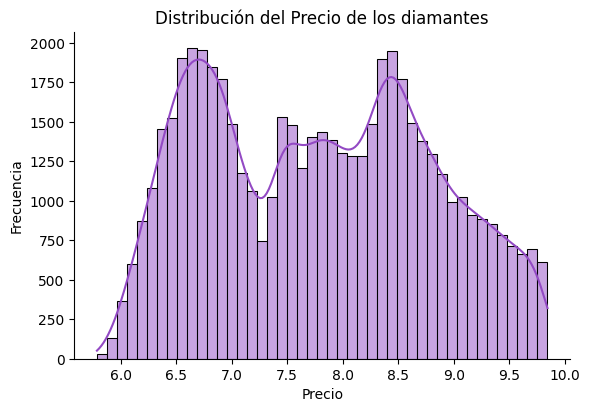

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.displot(np.log(df_encoder['price']), height=4, aspect=1.5, kde=True, color = '#934ac4')
plt.title("Distribución del Precio de los diamantes", fontsize=12)  
plt.xlabel("Precio", fontsize=10)  
plt.ylabel("Frecuencia", fontsize=10) 

plt.savefig("dist_price.png") 
plt.show();

>-**Observación**
>- La variable `precio` tiene naturaleza que se ajusta a un comportamiento de distribución `lognormal`, por ello, trabajaremos con el valor logarítmico del precio para nuestras correlaciones.

In [16]:
variables_numericas = df_encoder.select_dtypes(include=['number']).columns.tolist()
variables_numericas.remove(target)

In [17]:
dataResume['type'] = dataResume['type'].replace({'object':'numeric'})
dataResume.to_csv('dataResume.csv')

In [18]:
dataResume

,feature,type
0,carat,numeric
1,depth,numeric
2,table,numeric
3,x,numeric
4,y,numeric
5,z,numeric
0,cut,numeric
1,color,numeric
2,clarity,numeric
0,price,target


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

color_pastel = sns.color_palette("pastel")[1]  
plt.figure(figsize=(8, 6))
for col in variables_numericas:
    plt.figure()  
    sns.histplot(df_encoder[col], kde=True, color=color_pastel)
    plt.title("Distribución de " + col, fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frecuencia", fontsize=10)
    plt.savefig("Proyecto_diamantes/plots/dist_" + col + ".png")
    plt.close()

<Figure size 800x600 with 0 Axes>

<a id='sec_3'></a>
## `3. Selección de muestras`

El objetivo de esta fase es poder divir en dos partes: el conjunto de entrenamiento (train) y el conjunto de prueba (test). Estas divisiones se utilizan para entrenar y evaluar los modelos.

- `|Train:|` El conjunto de entrenamiento se utiliza para entrenar el modelo de aprendizaje automático. Es aquí donde el modelo "aprende" los patrones y relaciones en los datos para poder hacer predicciones o clasificaciones.

- `|Test:|` El conjunto de prueba se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Es una medida objetiva de la capacidad del modelo para generalizar y realizar predicciones precisas en nuevos datos.

1. División del dataset de datos
2. Analisis exploratorio de relación de datos
3. Creación de una variable apartir de rangos de quilates de los diamantes
4. Analisis exploratorio de rangos de quilates de los diamantes por el precio

**3.1. División del dataset de datos**

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_encoder,
                               train_size = 0.7,
                               random_state = 42)

In [21]:
print(f"Tamaño del total de datos: {len(df_encoder)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 53885
Tamaño de train: 37719
Tamaño de test: 16166


>**Observación**
>- Se puede observar que el dataset se ha dividido en 2 partes, en `train` y `test`

**3.2. Analisis exploratorio de relación de datos**

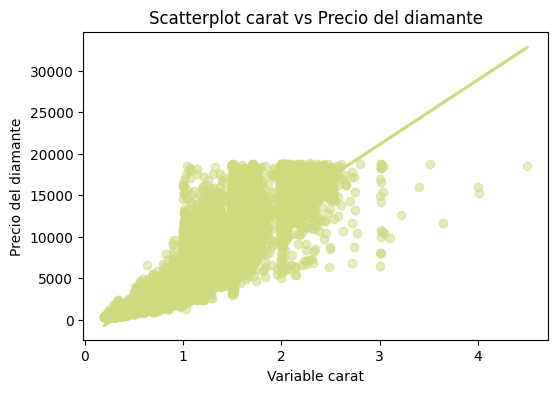

In [22]:
plt.figure(figsize=(6, 4))
sns.regplot(x = train['carat'], y = train['price'], scatter_kws={"alpha": 0.5}, color = '#cfd97d')
plt.title(f"Scatterplot carat vs Precio del diamante")
plt.xlabel("Variable carat")
plt.ylabel("Precio del diamante")
plt.show()

In [23]:
plt.figure(figsize=(4, 6))  

for col in variables_numericas:
  sns.regplot(x = train[col], y = train[target], scatter_kws={"alpha": 0.5})
  plt.title(f"Scatterplot {col} vs Precio del diamante")
  plt.xlabel(f"Variable {col}")
  plt.ylabel("Precio del diamante")
  plt.savefig("Proyecto_diamantes/plots/scatter_" + col + ".png") 
  plt.close()

**3.3. Creación de una variable apartir de rangos de quilates de los diamantes**

In [24]:
def rangos_quilates(x):
    if x < 1:
        return 1
    elif x >= 1 and x < 1.5:
        return 2
    elif x >= 1.5 and x < 2:
        return 3
    else:
        return 4

In [25]:
train['rango_carat'] = train['carat'].apply( lambda x: rangos_quilates(x))
test['rango_carat'] = test['carat'].apply( lambda x: rangos_quilates(x))

*Filtro por rango de quilates para gráficar*

In [26]:
train_cara_q1 = train[train['rango_carat'] == 1]
train_cara_q2 = train[train['rango_carat'] == 2]
train_cara_q3 = train[train['rango_carat'] == 3]
train_cara_q4 = train[train['rango_carat'] == 4]

**3.4. Analisis exploratorio de rangos de quilates de los diamantes por el precio**

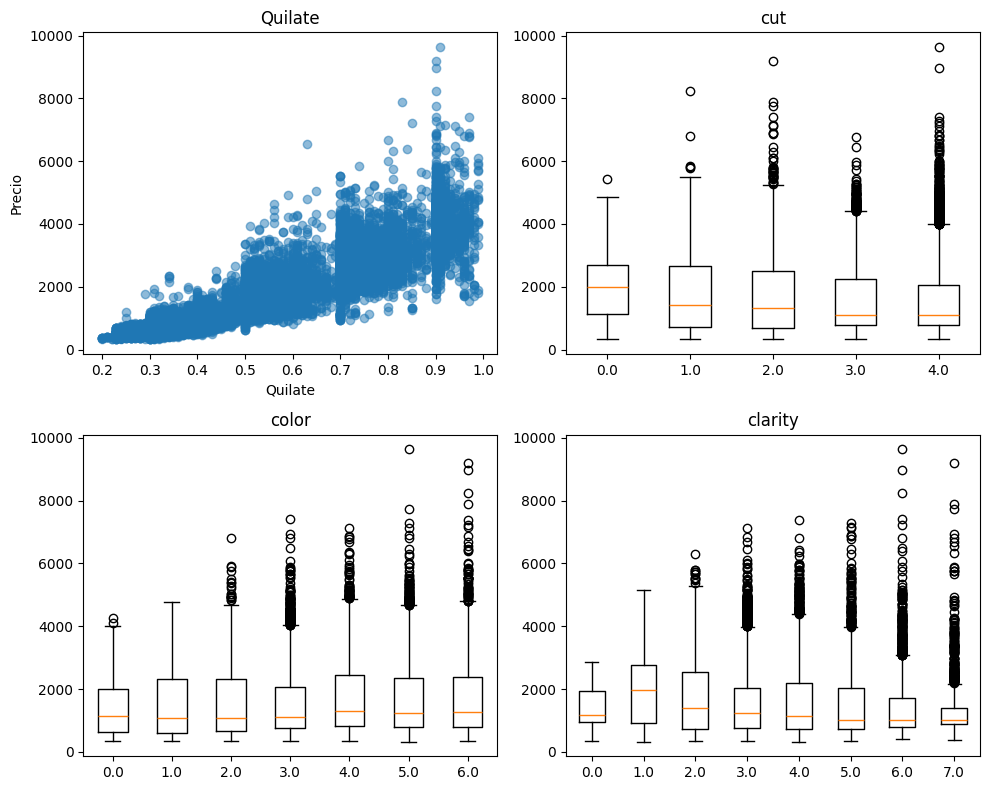

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de dispersión para Quilate
axs[0,0].scatter(train_cara_q1['carat'], train_cara_q1['price'], alpha=0.5)
axs[0,0].set_title('Quilate')
axs[0,0].set_xlabel('Quilate')
axs[0,0].set_ylabel('Precio')

# Gráfico de caja para Corte
axs[0, 1].boxplot([train_cara_q1[train_cara_q1['cut'] == x]['price'] for x in sorted(train_cara_q1['cut'].unique())])
axs[0, 1].set_title('cut')
axs[0, 1].set_xticklabels(sorted(train_cara_q1['cut'].unique()))

# Gráfico de caja para Color
axs[1, 0].boxplot([train_cara_q1[train_cara_q1['color'] == x]['price'] for x in sorted(train_cara_q1['color'].unique())])
axs[1, 0].set_title('color')
axs[1, 0].set_xticklabels(sorted(train_cara_q1['color'].unique()))

# Gráfico de caja para claridad
axs[1, 1].boxplot([train_cara_q1[train_cara_q1['clarity'] == x]['price'] for x in sorted(train_cara_q1['clarity'].unique())])
axs[1, 1].set_title('clarity')
axs[1, 1].set_xticklabels(sorted(train_cara_q1['clarity'].unique()))

plt.tight_layout()
plt.savefig("Proyecto_diamantes/rangos_quilates/rangos_1.png") 
plt.show()


>**Observación**
>- Menores a 1 quilate la variable que tiene mayor injerencia es el propio valor del quilate (R2=0.84). Las propiedades como la Claridad, Color y Corte no tienen relevancia.

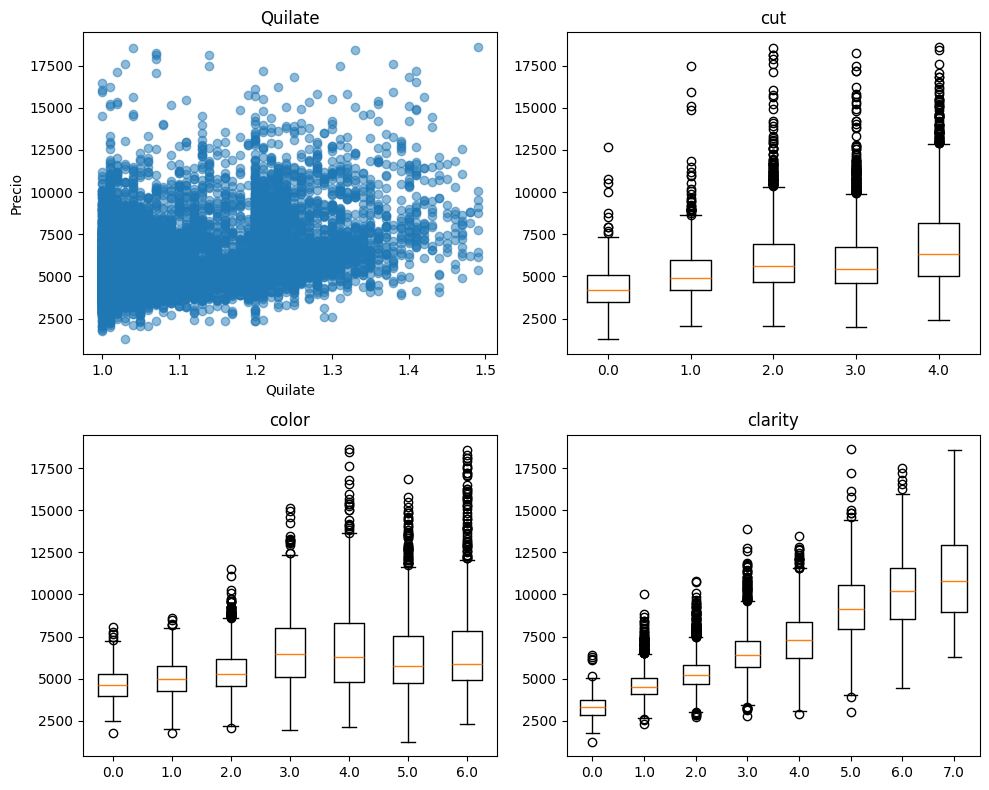

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de dispersión para Quilate
axs[0,0].scatter(train_cara_q2['carat'], train_cara_q2['price'], alpha=0.5)
axs[0,0].set_title('Quilate')
axs[0,0].set_xlabel('Quilate')
axs[0,0].set_ylabel('Precio')

# Gráfico de caja para Corte
axs[0, 1].boxplot([train_cara_q2[train_cara_q2['cut'] == x]['price'] for x in sorted(train_cara_q2['cut'].unique())])
axs[0, 1].set_title('cut')
axs[0, 1].set_xticklabels(sorted(train_cara_q2['cut'].unique()))

# Gráfico de caja para Color
axs[1, 0].boxplot([train_cara_q2[train_cara_q2['color'] == x]['price'] for x in sorted(train_cara_q2['color'].unique())])
axs[1, 0].set_title('color')
axs[1, 0].set_xticklabels(sorted(train_cara_q2['color'].unique()))

# Gráfico de caja para claridad
axs[1, 1].boxplot([train_cara_q2[train_cara_q2['clarity'] == x]['price'] for x in sorted(train_cara_q2['clarity'].unique())])
axs[1, 1].set_title('clarity')
axs[1, 1].set_xticklabels(sorted(train_cara_q2['clarity'].unique()))

plt.tight_layout()
plt.savefig("Proyecto_diamantes/rangos_quilates/rangos_2.png") 
plt.show()


>**Observación**
>- Para los diamantes de 1 a 1.5 quilates, el precio depende principalmente de la Claridad, ligeramente del Color y Corte. El valor del quilate no tiene injerencia.

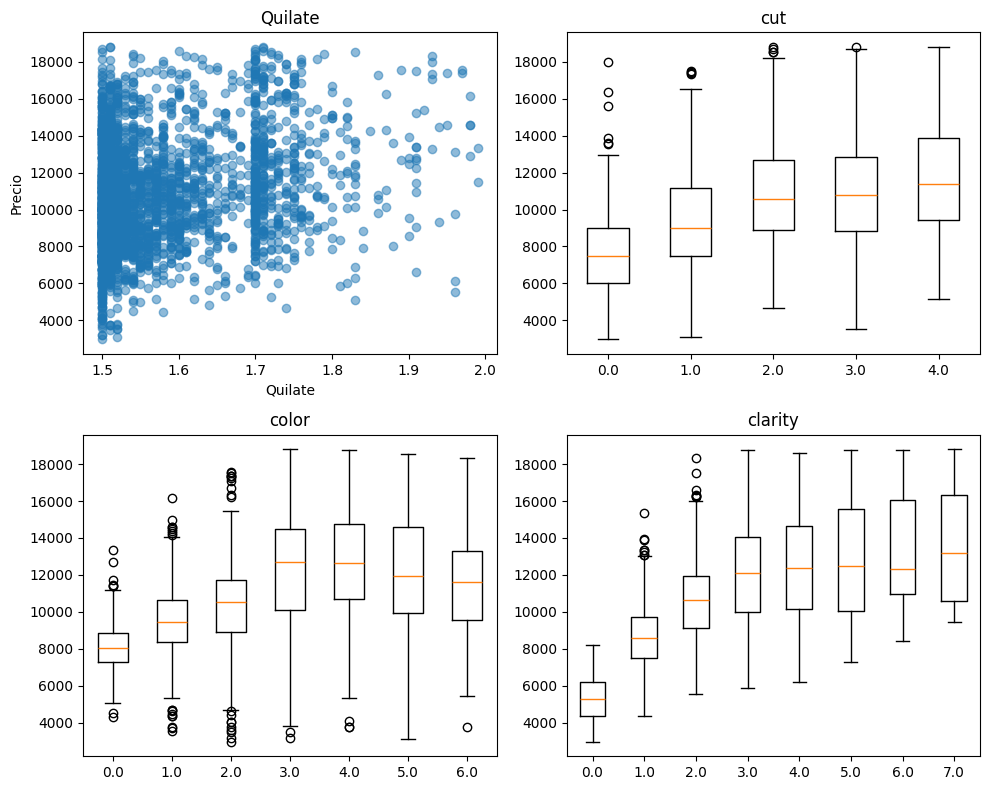

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de dispersión para Quilate
axs[0,0].scatter(train_cara_q3['carat'], train_cara_q3['price'], alpha=0.5)
axs[0,0].set_title('Quilate')
axs[0,0].set_xlabel('Quilate')
axs[0,0].set_ylabel('Precio')

# Gráfico de caja para Corte
axs[0, 1].boxplot([train_cara_q3[train_cara_q3['cut'] == x]['price'] for x in sorted(train_cara_q3['cut'].unique())])
axs[0, 1].set_title('cut')
axs[0, 1].set_xticklabels(sorted(train_cara_q3['cut'].unique()))

# Gráfico de caja para Color
axs[1, 0].boxplot([train_cara_q3[train_cara_q3['color'] == x]['price'] for x in sorted(train_cara_q3['color'].unique())])
axs[1, 0].set_title('color')
axs[1, 0].set_xticklabels(sorted(train_cara_q3['color'].unique()))

# Gráfico de caja para claridad
axs[1, 1].boxplot([train_cara_q3[train_cara_q3['clarity'] == x]['price'] for x in sorted(train_cara_q3['clarity'].unique())])
axs[1, 1].set_title('clarity')
axs[1, 1].set_xticklabels(sorted(train_cara_q3['clarity'].unique()))

plt.tight_layout()
plt.savefig("Proyecto_diamantes/rangos_quilates/rangos_3.png") 
plt.show()

>**Observación**
>- Para los diamantes de 1.5 a 2.0 quilates, el precio depende principalmente de la Claridad, y en menor medida, del Corte y Color. El valor del quilate no tiene injerencia.

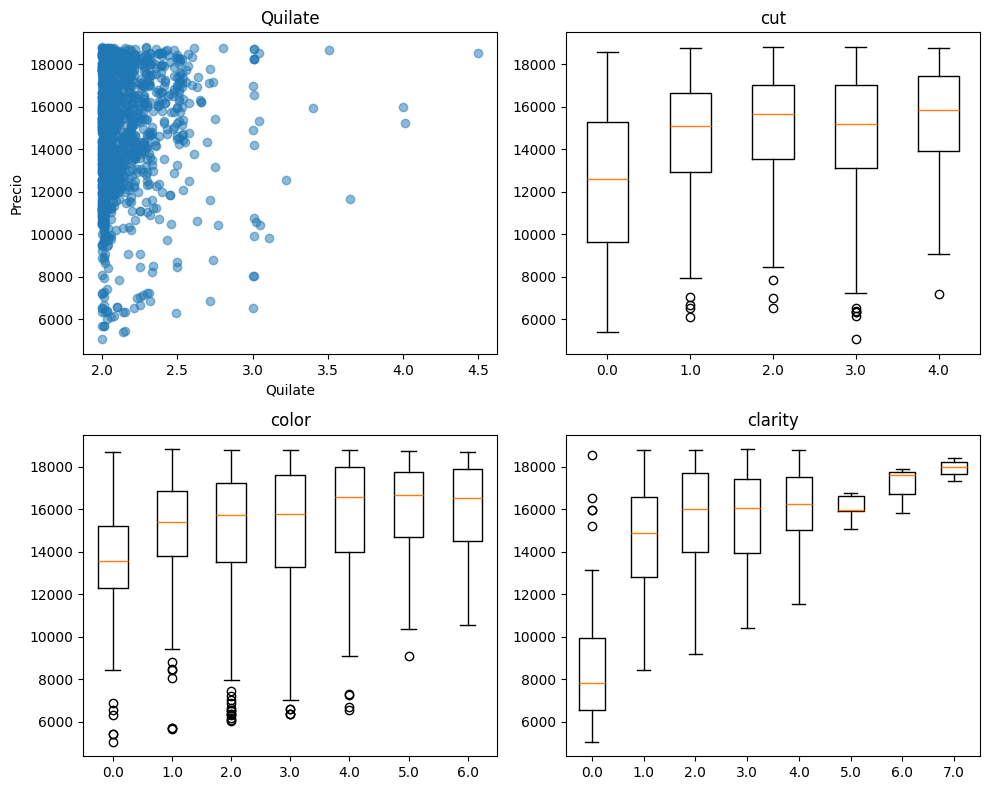

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de dispersión para Quilate
axs[0,0].scatter(train_cara_q4['carat'], train_cara_q4['price'], alpha=0.5)
axs[0,0].set_title('Quilate')
axs[0,0].set_xlabel('Quilate')
axs[0,0].set_ylabel('Precio')

# Gráfico de caja para Corte
axs[0, 1].boxplot([train_cara_q4[train_cara_q4['cut'] == x]['price'] for x in sorted(train_cara_q4['cut'].unique())])
axs[0, 1].set_title('cut')
axs[0, 1].set_xticklabels(sorted(train_cara_q4['cut'].unique()))

# Gráfico de caja para Color
axs[1, 0].boxplot([train_cara_q4[train_cara_q4['color'] == x]['price'] for x in sorted(train_cara_q4['color'].unique())])
axs[1, 0].set_title('color')
axs[1, 0].set_xticklabels(sorted(train_cara_q4['color'].unique()))

# Gráfico de caja para claridad
axs[1, 1].boxplot([train_cara_q4[train_cara_q4['clarity'] == x]['price'] for x in sorted(train_cara_q4['clarity'].unique())])
axs[1, 1].set_title('clarity')
axs[1, 1].set_xticklabels(sorted(train_cara_q4['clarity'].unique()))

plt.tight_layout()
plt.savefig("Proyecto_diamantes/rangos_quilates/rangos_4.png") 
plt.show()

>**Observación**
>- Para los diamantes mayor a 2.0 quilates, salvo para el menor valor de Claridad (I1), el precio depende muy ligeramente de la Claridad, del Corte y Color. El valor del quilate no tiene relevante injerencia.

<a id='sec_4'></a>
## `4. Pre-selección de variables`

El objetivo de esta fase es poder Pre-Seleccionar las variable que tenga una mejor correlación con nuestro target `price`,
basado con un analisis estadistico, missings y correlación.

1. Analisis estadisticos
2. Missing y Fillrate
3. Creación de correlación con de los features con nuestro target
4. Exportación de datos generados
5. Pre-Selección de variables

**4.1. Analisis estadisticos**

In [31]:
pdResume = train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50
1,cut,37719.0,2.902993,1.115857,0.0,2.00,3.00,4.00,4.00
2,color,37719.0,3.402768,1.700173,0.0,2.00,3.00,5.00,6.00
3,clarity,37719.0,3.059466,1.650228,0.0,2.00,3.00,4.00,7.00
4,depth,37719.0,61.747867,1.432647,43.0,61.00,61.80,62.50,79.00
5,table,37719.0,57.467523,2.221136,43.0,56.00,57.00,59.00,79.00
6,price,37719.0,3960.723508,4016.925194,326.0,956.00,2405.00,5376.00,18823.00
7,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23
8,y,30075.0,5.737424,1.167787,0.0,4.72,5.71,6.54,58.90
9,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80


**4.2. Missing y Fillrate**

In [32]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
8,y,30075.0,5.737424,1.167787,0.0,4.72,5.71,6.54,58.90,0.202656
7,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138
9,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157
0,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000
1,cut,37719.0,2.902993,1.115857,0.0,2.00,3.00,4.00,4.00,0.000000
2,color,37719.0,3.402768,1.700173,0.0,2.00,3.00,5.00,6.00,0.000000
3,clarity,37719.0,3.059466,1.650228,0.0,2.00,3.00,4.00,7.00,0.000000
4,depth,37719.0,61.747867,1.432647,43.0,61.00,61.80,62.50,79.00,0.000000
5,table,37719.0,57.467523,2.221136,43.0,56.00,57.00,59.00,79.00,0.000000
6,price,37719.0,3960.723508,4016.925194,326.0,956.00,2405.00,5376.00,18823.00,0.000000


**4.3. Creación de correlación con de los features con nuestro target**

In [33]:
correlations = train.corr()[['price']]
correlations.reset_index(inplace = True)
correlations.rename(columns = {'index' : 'feature',
                               'price' : 'corr'}, inplace = True)
correlations

,feature,corr
0,carat,0.922264
1,cut,-0.052220
2,color,-0.172632
3,clarity,-0.147566
4,depth,-0.011971
5,table,0.128241
6,price,1.000000
7,x,0.884539
8,y,0.850867
9,z,0.851850


In [34]:
univariate = pd.merge(pdResume, correlations, on = 'feature')
univariate.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr
0,y,30075.0,5.737424,1.167787,0.0,4.72,5.71,6.54,58.90,0.202656,0.850867
1,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138,0.884539
2,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157,0.851850
3,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000,0.922264
4,cut,37719.0,2.902993,1.115857,0.0,2.00,3.00,4.00,4.00,0.000000,-0.052220


*Creación de una columna llamada correlacion absoluta(abs_corr)*

In [35]:
# Creamos la columna correlacion absoluta
univariate['abs_corr'] = univariate['corr'].apply(lambda x: abs(x))
univariate.sort_values(by = 'abs_corr', ascending = False, inplace=True)
univariate.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
9,price,37719.0,3960.723508,4016.925194,326.0,956.00,2405.00,5376.00,18823.00,0.000000,1.000000,1.000000
3,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000,0.922264,0.922264
10,rango_carat,37719.0,1.513163,0.804918,1.0,1.00,1.00,2.00,4.00,0.000000,0.904420,0.904420
1,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138,0.884539,0.884539
2,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157,0.851850,0.851850


In [36]:
univariate

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
9,price,37719.0,3960.723508,4016.925194,326.0,956.00,2405.00,5376.00,18823.00,0.000000,1.000000,1.000000
3,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000,0.922264,0.922264
10,rango_carat,37719.0,1.513163,0.804918,1.0,1.00,1.00,2.00,4.00,0.000000,0.904420,0.904420
1,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138,0.884539,0.884539
2,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157,0.851850,0.851850
0,y,30075.0,5.737424,1.167787,0.0,4.72,5.71,6.54,58.90,0.202656,0.850867,0.850867
5,color,37719.0,3.402768,1.700173,0.0,2.00,3.00,5.00,6.00,0.000000,-0.172632,0.172632
6,clarity,37719.0,3.059466,1.650228,0.0,2.00,3.00,4.00,7.00,0.000000,-0.147566,0.147566
8,table,37719.0,57.467523,2.221136,43.0,56.00,57.00,59.00,79.00,0.000000,0.128241,0.128241
4,cut,37719.0,2.902993,1.115857,0.0,2.00,3.00,4.00,4.00,0.000000,-0.052220,0.052220


**4.4. Exportación de datos generados**

In [37]:
univariate.to_csv('Proyecto_diamantes/results/univariate_assesment.csv', index = 0)

**4.5. Pre-Selección de variables**

In [39]:
preselection = univariate.loc[(univariate['abs_corr'] >= 0.12) & (univariate['missing_rate'] <= 0.8)]
print(f"{len(preselection)} variables de {len(univariate)} pasan el proceso de pre-selección")

9 variables de 11 pasan el proceso de pre-selección


In [40]:
preselection

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
9,price,37719.0,3960.723508,4016.925194,326.0,956.00,2405.00,5376.00,18823.00,0.000000,1.000000,1.000000
3,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000,0.922264,0.922264
10,rango_carat,37719.0,1.513163,0.804918,1.0,1.00,1.00,2.00,4.00,0.000000,0.904420,0.904420
1,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138,0.884539,0.884539
2,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157,0.851850,0.851850
0,y,30075.0,5.737424,1.167787,0.0,4.72,5.71,6.54,58.90,0.202656,0.850867,0.850867
5,color,37719.0,3.402768,1.700173,0.0,2.00,3.00,5.00,6.00,0.000000,-0.172632,0.172632
6,clarity,37719.0,3.059466,1.650228,0.0,2.00,3.00,4.00,7.00,0.000000,-0.147566,0.147566
8,table,37719.0,57.467523,2.221136,43.0,56.00,57.00,59.00,79.00,0.000000,0.128241,0.128241


>- **Observación**
>- asdasdasd
>- asdasd

<a id='sec_5'></a>
## `5. Preparación de datos`

El objetivo de esta fase es poder preparas nuestros feature para antes de poder utilizar nuestros modelos de Machine Learning

1. Tratamiento de outliers
2. Tratamiento de missings
3. Reescalamiento de datos por Z-Score


**5.1. Tratamiento de outliers**

[![image.png](https://i.postimg.cc/3R620sz5/image.png)](https://postimg.cc/ftcV6rwB)

>**Rango Intercuantílico**
>- El tratamiento de outliers utilizando el rango intercuartílico (IQR, por sus siglas en inglés) es una técnica común para identificar y manejar valores atípicos en un conjunto de datos. El rango intercuartílico es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de los datos.

*Cargando nuestro archivo donde se guardo los datos Pre-Seleccionados*

In [41]:
univariate_II = pd.read_csv('Proyecto_diamantes/results/univariate_assesment.csv')
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
0,price,37719.0,3960.723508,4016.925194,326.0,956.00,2405.00,5376.00,18823.00,0.000000,1.000000,1.000000
1,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000,0.922264,0.922264
2,rango_carat,37719.0,1.513163,0.804918,1.0,1.00,1.00,2.00,4.00,0.000000,0.904420,0.904420
3,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138,0.884539,0.884539
4,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157,0.851850,0.851850


*Calculando los intervalos RIC*

In [42]:
univariate_II['ric']     = univariate_II['Q3'] - univariate_II['Q1']
univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric
0,price,37719.0,3960.723508,4016.925194,326.0,956.00,2405.00,5376.00,18823.00,0.000000,1.000000,1.000000,4420.00,-5674.000,12006.000
1,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000,0.922264,0.922264,0.64,-0.560,2.000
2,rango_carat,37719.0,1.513163,0.804918,1.0,1.00,1.00,2.00,4.00,0.000000,0.904420,0.904420,1.00,-0.500,3.500
3,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138,0.884539,0.884539,1.83,1.975,9.295
4,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157,0.851850,0.851850,1.13,1.215,5.735


In [43]:
univariate_II

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric
0,price,37719.0,3960.723508,4016.925194,326.0,956.00,2405.00,5376.00,18823.00,0.000000,1.000000,1.000000,4420.00,-5674.000,12006.000
1,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000,0.922264,0.922264,0.64,-0.560,2.000
2,rango_carat,37719.0,1.513163,0.804918,1.0,1.00,1.00,2.00,4.00,0.000000,0.904420,0.904420,1.00,-0.500,3.500
3,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138,0.884539,0.884539,1.83,1.975,9.295
4,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157,0.851850,0.851850,1.13,1.215,5.735
5,y,30075.0,5.737424,1.167787,0.0,4.72,5.71,6.54,58.90,0.202656,0.850867,0.850867,1.82,1.990,9.270
6,color,37719.0,3.402768,1.700173,0.0,2.00,3.00,5.00,6.00,0.000000,-0.172632,0.172632,3.00,-2.500,9.500
7,clarity,37719.0,3.059466,1.650228,0.0,2.00,3.00,4.00,7.00,0.000000,-0.147566,0.147566,2.00,-1.000,7.000
8,table,37719.0,57.467523,2.221136,43.0,56.00,57.00,59.00,79.00,0.000000,0.128241,0.128241,3.00,51.500,63.500
9,cut,37719.0,2.902993,1.115857,0.0,2.00,3.00,4.00,4.00,0.000000,-0.052220,0.052220,2.00,-1.000,7.000


*Tratamiento de outliers por RIC en train y test*

In [45]:
for col in preselection.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]

  lower_limit = desc.min_ric.values[0]
  upper_limit = desc.max_ric.values[0]

  train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
  test[col + '_tric']  = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,rango_carat,price_tric,carat_tric,rango_carat_tric,x_tric,z_tric,y_tric,color_tric,clarity_tric,table_tric
33058,0.30,4.0,4.0,6.0,61.1,56.0,814,4.33,4.38,2.66,1,814.0,0.30,1.0,4.33,2.66,4.38,4.0,6.0,56.0
14626,1.24,4.0,1.0,2.0,62.1,56.0,5902,6.88,6.84,4.26,2,5902.0,1.24,2.0,6.88,4.26,6.84,1.0,2.0,56.0
48729,0.52,4.0,3.0,5.0,62.1,56.0,2012,NaN,5.14,3.20,1,2012.0,0.52,1.0,NaN,3.20,5.14,3.0,5.0,56.0
38826,0.32,4.0,6.0,5.0,61.3,55.8,1048,4.43,4.44,2.71,1,1048.0,0.32,1.0,4.43,2.71,4.44,6.0,5.0,55.8
48734,0.52,4.0,3.0,5.0,62.3,55.0,2012,5.16,NaN,3.20,1,2012.0,0.52,1.0,5.16,3.20,NaN,3.0,5.0,55.0


*Gráfica sin y con outliers*

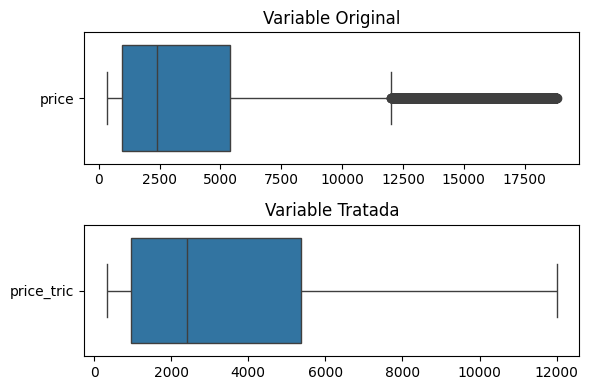

In [46]:
# Crear figura y subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

ax1 = axes[0]
sns.boxplot(data=train[['price']], orient="h", ax=ax1)
ax1.set_title('Variable Original')

ax2 = axes[1]
sns.boxplot(data=train[['price_tric']], orient="h", ax=ax2)
ax2.set_title('Variable Tratada')

plt.tight_layout()


plt.show()

>**Observación**
>- Como se puede observar en la imagen ya no se tiene valores outliers y fueron tratados mediante rangos intercuartiles

**5.2. Tratamiento de outliers**

Imputación de valores: En lugar de eliminar los valores faltantes, se pueden reemplazar por valores estimados o imputados. Esto implica reemplazar los valores faltantes con medidas de tendencia central, como la media o la mediana, o utilizar métodos más avanzados como la regresión o el algoritmo K-NN para estimar los valores faltantes basándose en otros atributos del conjunto de datos.

*Variables hasta el momento*


In [47]:
actual_features = [x + '_tric' for x in preselection.feature.tolist()]
actual_features

['price_tric',
 'carat_tric',
 'rango_carat_tric',
 'x_tric',
 'z_tric',
 'y_tric',
 'color_tric',
 'clarity_tric',
 'table_tric']

*Tratamiento mediante estadistica de tendencia central(median) para train y test en valores missing*

In [48]:
train[[x + '_imp' for x in actual_features]] = train[actual_features].fillna(train[actual_features].median())
test[[x + '_imp' for x in actual_features]] = test[actual_features].fillna(train[actual_features].median())

In [50]:
train[[x + '_imp' for x in actual_features]].head(10)

,price_tric_imp,carat_tric_imp,rango_carat_tric_imp,x_tric_imp,z_tric_imp,y_tric_imp,color_tric_imp,clarity_tric_imp,table_tric_imp
33058,814.0,0.30,1.0,4.33,2.66,4.38,4.0,6.0,56.0
14626,5902.0,1.24,2.0,6.88,4.26,6.84,1.0,2.0,56.0
48729,2012.0,0.52,1.0,5.70,3.20,5.14,3.0,5.0,56.0
38826,1048.0,0.32,1.0,4.43,2.71,4.44,6.0,5.0,55.8
48734,2012.0,0.52,1.0,5.16,3.20,5.71,3.0,5.0,55.0
28906,684.0,0.30,1.0,4.32,2.64,4.35,3.0,5.0,57.0
10381,592.0,0.29,1.0,4.14,2.67,4.11,6.0,3.0,62.0
20566,8877.0,1.21,2.0,6.81,4.17,5.71,4.0,3.0,57.0
12587,5283.0,1.23,2.0,6.99,4.11,6.97,6.0,1.0,58.0
38428,1026.0,0.48,1.0,5.04,3.14,5.05,2.0,3.0,54.0
